<a href="https://colab.research.google.com/github/sdr999/PredictiPay/blob/main/PredictiPay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install wget

In [2]:
import pandas as pd
import requests
import wget
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csv_url="https://raw.githubusercontent.com/sdr999/PredictiPay/main/Salary_Data_Based_country_and_race.csv"
response= requests.get(csv_url)
with open("Salary_Data_Based_country_and_race.csv","wb") as file:
  file.write(response.content)
data=pd.read_csv("Salary_Data_Based_country_and_race.csv")

data.head()

Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian

In [4]:
data.shape

(6704, 9)

In [5]:
data.describe()

Unnamed: 0          Age  Years of Experience         Salary
count  6704.000000  6702.000000          6701.000000    6699.000000
mean   3351.500000    33.620859             8.094687  115326.964771
std    1935.422435     7.614633             6.059003   52786.183911
min       0.000000    21.000000             0.000000     350.000000
25%    1675.750000    28.000000             3.000000   70000.000000
50%    3351.500000    32.000000             7.000000  115000.000000
75%    5027.250000    38.000000            12.000000  160000.000000
max    6703.000000    62.000000            34.000000  250000.000000

In [6]:
data.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [9]:
data.drop(columns="Unnamed: 0", axis=0, inplace=True)

In [10]:
data.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary Country      Race  
0   90000.0      UK     White  
1   65000.0     USA  Hispanic  
2  150000.0  Canada     White  
3   60000.0     USA  Hispanic  
4  200000.0     USA     Asian

In [11]:
data.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [12]:
def categorize_Job(job_title):
  job_title=str(job_title).lower()
  if 'software' in job_title or 'developer' in job_title:
    return 'Software/Developer'
  elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
    return 'Data Analyst/Scientist'
  elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
    return 'Manager/Director/VP'
  elif 'sales' in job_title or 'representative' in job_title:
    return 'Sales'
  elif 'marketing' in job_title or 'social media' in job_title:
    return 'Marketing/Social Media'
  elif 'product' in job_title or 'designer' in job_title:
    return 'Product/Designer'
  elif 'hr' in job_title or 'human resources' in job_title:
    return 'HR/Human Resources'
  elif 'financial' in job_title or 'accountant' in job_title:
    return 'Financial/Accountant'
  elif 'project manager' in job_title:
    return 'Project Manager'
  elif 'it' in job_title or 'support' in job_title:
    return 'IT/Technical Support'
  elif 'operations' in job_title or 'supply chain' in job_title:
    return 'Operations/Supply Chain'
  elif 'customer service' in job_title or 'receptionist' in job_title:
    return 'Customer Service/Receptionist'
  else:
    return 'Other'

data['Job Title']=data['Job Title'].apply(categorize_Job)

In [13]:
def group_education(Educaton):
 Educaton = str(Educaton).lower()
 if 'high school' in Educaton:
  return 'High School'
 elif 'bachelor\'s' in Educaton:
  return 'Bachelors'
 elif 'master\'s' in Educaton:
  return 'Masters'
 elif 'phd' in Educaton:
  return 'PhD'
data['Education Level']=data['Education Level'].apply(group_education)

In [14]:
data.head()

Age  Gender Education Level               Job Title  Years of Experience  \
0  32.0    Male       Bachelors      Software/Developer                  5.0   
1  28.0  Female         Masters  Data Analyst/Scientist                  3.0   
2  45.0    Male             PhD     Manager/Director/VP                 15.0   
3  36.0  Female       Bachelors                   Sales                  7.0   
4  52.0    Male         Masters     Manager/Director/VP                 20.0   

     Salary Country      Race  
0   90000.0      UK     White  
1   65000.0     USA  Hispanic  
2  150000.0  Canada     White  
3   60000.0     USA  Hispanic  
4  200000.0     USA     Asian

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
values=['Gender','Education Level','Job Title','Country','Race']
for value in values:
  data[value]=lb.fit_transform(data[value])
  print(value,data[value].unique())

Gender [1 0 2]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Country [3 4 1 2 0]
Race [9 5 1 6 4 2 8 0 7 3]


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(data[['Age', 'Years of Experience', 'Salary']])

In [17]:
data.head()

Age  Gender  Education Level  Job Title  Years of Experience  \
0 -0.213129       1                0         11            -0.510769   
1 -0.738393       0                2          1            -0.840811   
2  1.493980       1                3          5             1.139440   
3  0.312135       0                0         10            -0.180727   
4  2.413192       1                2          5             1.964544   

     Salary  Country  Race  
0 -0.479849        3     9  
1 -0.953461        4     5  
2  0.656819        1     9  
3 -1.048183        4     5  
4  1.604042        4     1

<Axes: >

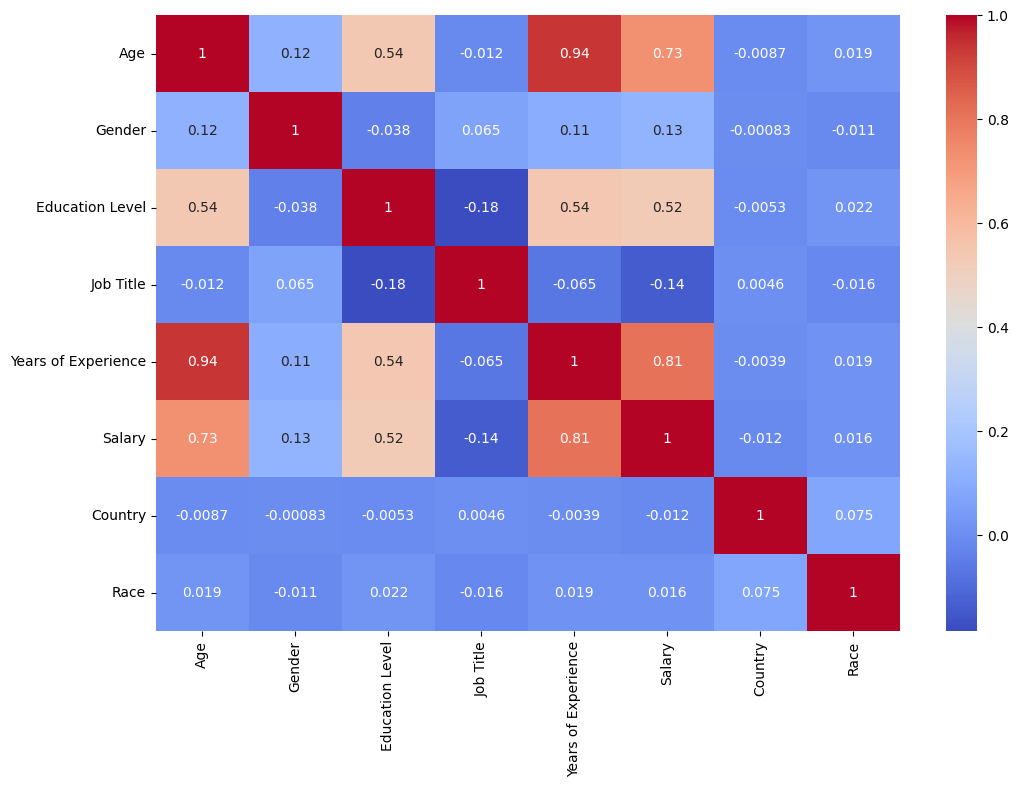

In [18]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Salary', axis=1), data['Salary'], test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

In [21]:
from sklearn.model_selection import GridSearchCV

#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(X_train,y_train)

#print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [22]:
dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [23]:
#fitting the training data
dtree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [24]:
#training accuracy
dtree.score(X_train, y_train)

0.9656459784687974

In [25]:
#predicting the salary of an employee
d_pred = dtree.predict(X_test)

In [26]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

Actual  Predicted
0  0.656819   0.678470
1 -0.745659  -0.688434
2 -0.290405  -0.290405
3 -1.048183  -1.036343
4 -0.669294  -0.610093
5  1.414598   1.494747
6 -0.820850  -0.715794
7 -1.142906  -1.122777
8  1.509320   1.554189
9  0.277930   0.287811

<Axes: xlabel='Actual', ylabel='Density'>

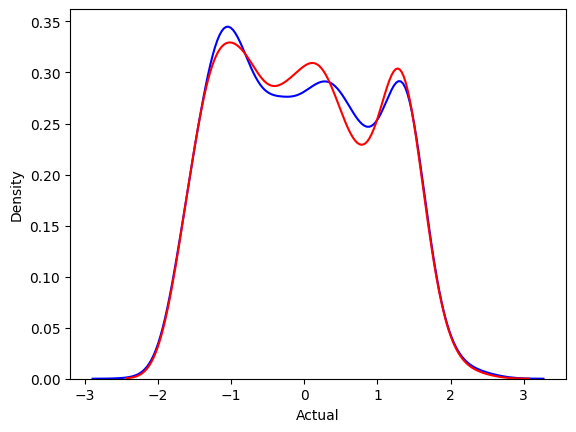

In [27]:
ax = sns.kdeplot(dft['Actual'], color = 'blue', label = 'Actual')
sns.kdeplot(  dft['Predicted'], color = 'red', ax=ax, label = 'Predicted')

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.9323013355107719
Mean Squared Error:  0.06928069008068977
Mean Absolute Error:  0.13812719621413622
RMSE: 0.2632122529075912


In [29]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [30]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
#training accuracy
rfg.score(X_train, y_train)

0.9879689400076512

In [32]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

In [33]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

Actual  Predicted
0  0.656819   0.636321
1 -0.745659  -0.724711
2 -0.290405  -0.314275
3 -1.048183  -1.050078
4 -0.669294  -0.646707
5  1.414598   1.499981
6 -0.820850  -0.805637
7 -1.142906  -1.112274
8  1.509320   1.540720
9  0.277930   0.311925

<Axes: xlabel='Actual', ylabel='Density'>

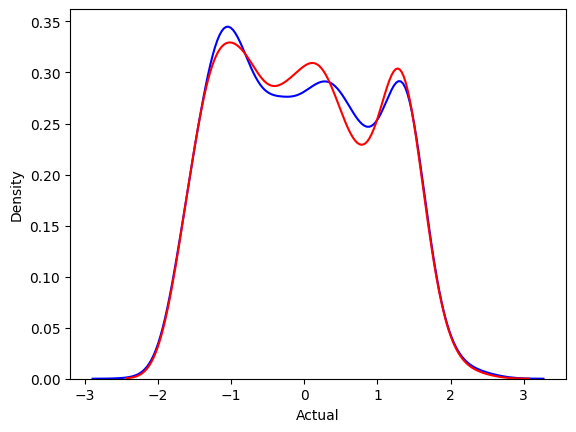

In [34]:
ax = sns.kdeplot(dft['Actual'], color = 'blue', label = 'Actual')
sns.kdeplot(  dft['Predicted'], color = 'red', ax=ax,label = 'Predicted')

In [35]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9461796449685231
Mean Squared Error:  0.0550780634315428
Mean Absolute Error:  0.1152619990578269
RMSE: 0.23468716077268223
